In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

Question 1.

In this question, we create an image by creating a matrix using numpy module. There are two subparts, one creates a binary image consisting of only 2 levels. and second a coloured image.


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def binary_shapes():
  '''
  Write a program to generate a binary image of 512 x 512 pixels. The image should have a black (pixel value 0) boundary having a width of 40 pixels. 
  After the black boundary, create a white (pixel value 255) square. Inside this square, create a black circle having the diameter equal to the length 
  of the square. Lastly create a white equilateral triangle inscribed within the circle.

  Inputs:
  no inputs

  Outputs: 
  out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
    + You cannot use cv2.circle to draw circle and cv2.fillPoly() to draw triangle . 
    + You are not allowed to use any other external package.

  '''

  out_img = np.zeros((512, 512), dtype=np.uint8) # Intialise with blank display
    
  #############################
  # Start your code from here #
  #############################

  pts = np.array([[256,40], [256+216*np.cos(30*np.pi/180), 40+216*(1+np.cos(60*np.pi/180))], [256-216*np.cos(30*np.pi/180), 40+216*(1+np.cos(60*np.pi/180))]], np.int32)
  # pts = np.array([[40,256], [40+216*(1+np.cos(60*np.pi/180)),256+216*np.cos(30*np.pi/180)], [40+216*(1+np.cos(60*np.pi/180)),256-216*np.cos(30*np.pi/180)]], np.int32)
  def fndarea(pts):
    return np.abs(pts[0,0]*(pts[1,1]-pts[2,1]) + pts[1,0]*(pts[2,1]-pts[0,1]) + pts[2,0]*(pts[0,1]-pts[1,1]))/2
  farea = fndarea(pts)

  for i in range(40, 473):
    for j in range(40, 473):
      out_img[i,j] = 255
      if np.sqrt((i-256)**2 + (j-256)**2) <= 216:
        out_img[i,j] = 0
      a1 = fndarea(np.array([[i,j], pts[0], pts[1]]))
      a2 = fndarea(np.array([[i,j], pts[1], pts[2]]))
      a3 = fndarea(np.array([[i,j], pts[2], pts[0]]))
      if abs(a1+a2+a3-farea) == 0:
        out_img[i,j] = 255 
    
  #############################
  # End your code here ########
  #############################    
    
  return np.uint8(out_img)

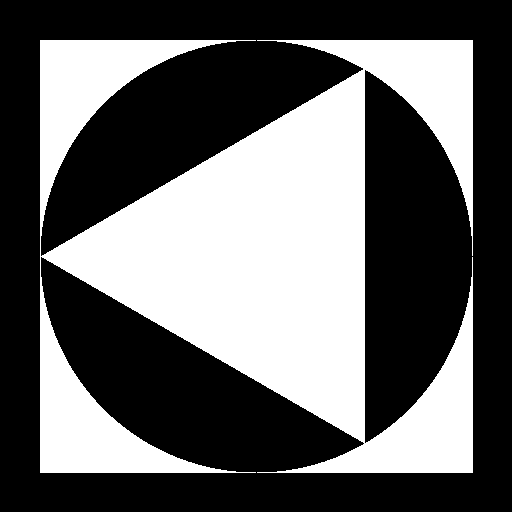

In [ ]:
img = binary_shapes()
cv2_imshow(img)

In [ ]:
def color_shape():
  '''
  You have to create an image similar to the previous one but instead of binary this image will be coloured one. 
  An colour image consists of three matrix each for R,G,B channel. The shapes will remain same as the above image but the colour of boundary will be white,
  squre should be in blue, cirlce should be in red and the triangle should be green. Create the R,G,B matrices respectively.

  Inputs:
  no inputs

  Outputs: 
  out_img - numpy array (of dtype np.uint8) containing the output image.

  Allowed external package:
    + You cannot use cv2.circle to draw circle and cv2.fillPoly() to draw triangle . 
    + You are not allowed to use any other external package.

  '''

  r = np.zeros((512, 512), dtype=np.uint8) # Intialise the red channel matrix
  g = np.zeros((512, 512), dtype=np.uint8) # Intialise the green channel matrix
  b = np.zeros((512, 512), dtype=np.uint8) # Intialise the blue channel matrix

  #############################
  # Start your code from here #
  #############################
  
  r = 255 + r
  g = 255 + g
  b = 255 + b
    
  pts = np.array([[256,40], [256+216*np.cos(30*np.pi/180), 40+216*(1+np.cos(60*np.pi/180))], [256-216*np.cos(30*np.pi/180), 40+216*(1+np.cos(60*np.pi/180))]], np.int32)
  # pts = np.array([[40,256], [40+216*(1+np.cos(60*np.pi/180)),256+216*np.cos(30*np.pi/180)], [40+216*(1+np.cos(60*np.pi/180)),256-216*np.cos(30*np.pi/180)]], np.int32)

  def fndarea(pts):
    return np.abs(pts[0,0]*(pts[1,1]-pts[2,1]) + pts[1,0]*(pts[2,1]-pts[0,1]) + pts[2,0]*(pts[0,1]-pts[1,1]))/2
  farea = fndarea(pts)

  for i in range(40, 473):
    for j in range(40, 473):
      b[i,j] = 255
      r[i,j] = g[i,j] = 0
      if np.sqrt((i-256)**2 + (j-256)**2) <= 216:
        r[i,j] = 255
        b[i,j] = g[i,j] = 0
      a1 = fndarea(np.array([[i,j], pts[0], pts[1]]))
      a2 = fndarea(np.array([[i,j], pts[1], pts[2]]))
      a3 = fndarea(np.array([[i,j], pts[2], pts[0]]))
      if abs(a1+a2+a3-farea) == 0:
        g[i,j] = 255
        r[i,j] = b[i,j] = 0 

  #############################
  # End your code here ########
  #############################    

  out_img_2 = cv2.merge((b,g,r))     #merging the r,g,b channels
  return np.uint8(out_img_2)

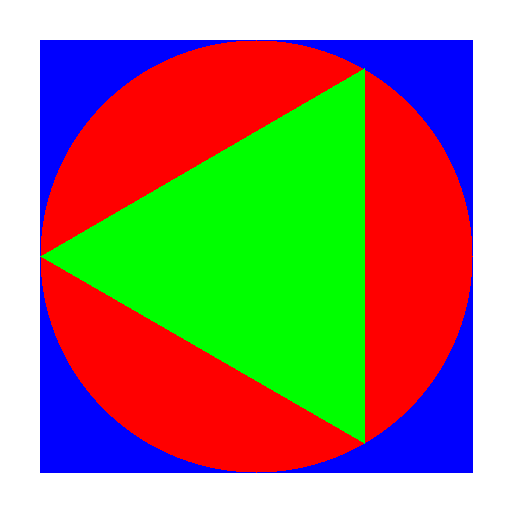

In [ ]:
img_1 = color_shape()
cv2_imshow(img_1)